In [2]:
import warnings
warnings.filterwarnings('ignore')

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.4.0


In [3]:
data = tf.keras.datasets.mnist
#data = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = data.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

## MNIST with CNN, Pooling Layer, Dropout Layer, Data augmentation

(100, 28, 28, 1)


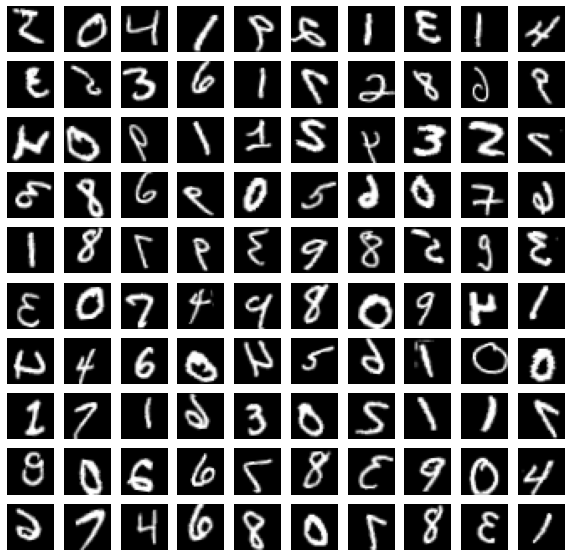

In [4]:
# http:||github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py

# rotation, zoom, shift, flip 등 지정
image_generator = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.10,
        shear_range=0.5,
        width_shift_range=0.10,
        height_shift_range=0.10,
        horizontal_flip=True,
        vertical_flip=False)

augment_size =100

# 이미지 생성
train_X = train_X.reshape(-1, 28, 28, 1)
x_augmented = image_generator.flow(train_X, train_Y, batch_size=augment_size, shuffle=False).next()[0]

print(x_augmented.shape)

# 새롭게 생성한 이미지 표시
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10, 10, c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28, 28), cmap='gray')
plt.show()

In [6]:
train_generator = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.10,
        shear_range=0.5,
        width_shift_range=0.10,
        height_shift_range=0.10,
        horizontal_flip=True,
        vertical_flip=False)

augment_size =3000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = train_generator.flow(x_augmented, np.zeros(augment_size), 
                                   batch_size=augment_size, shuffle=False).next()[0]

train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))
                         
print(train_X.shape)                         

(63000, 28, 28, 1)


In [7]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes= 10)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes= 10)

# MNIST 분류 컨볼루션 신경망 모델 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28,1 ), kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1477/1477 [==============================] - 43s 28ms/step - loss: 0.3720 - accuracy: 0.8817 - val_loss: 0.5673 - val_accuracy: 0.9005
Epoch 2/25
1477/1477 [==============================] - 44s 30ms/step - loss: 0.0868 - accuracy: 0.9744 - val_loss: 0.5801 - val_accuracy: 0.9069
Epoch 3/25
1477/1477 [==============================] - 42s 28ms/step - loss: 0.0651 - accuracy: 0.9809 - val_loss: 0.6313 - val_accuracy: 0.9102
Epoch 4/25
1477/1477 [==============================] - 42s 28ms/step - loss: 0.0514 - accuracy: 0.9847 - val_loss: 0.5914 - val_accuracy: 0.9077
Epoch 5/25
1477/1477 [==============================] - 42s 29ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.6464 - val_accuracy: 0.9133
Epoch 6/25
1477/1477 [==============================] - 41s 28ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.7983 - val_accuracy: 0.9062
Epoch 7/25
1477/1477 [==============================] - 43s 29ms/step - loss: 0.0466 - accuracy: 0.9868 - val_loss: 0.7968 -

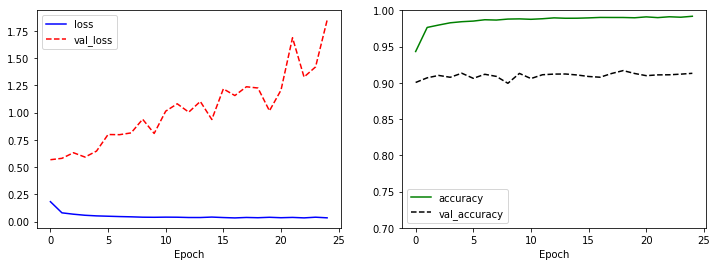

[0.10395727306604385, 0.9879000186920166]

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

test_X = test_X.reshape(-1, 28, 28, 1)
model.evaluate(test_X, test_Y, verbose=0)